In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('water_potability.csv')

In [3]:
dataset.isnull().values.any()

True

In [4]:
(dataset.isnull().sum()/len(dataset))*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [5]:
dataset.dropna(axis=0,inplace=True)

In [6]:
(dataset.isnull().sum()/len(dataset))*100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [7]:
X = dataset.iloc[:, [0, 3]].values
y = dataset.iloc[:, -1].values

In [8]:
X

array([[ 8.31676588,  8.05933238],
       [ 9.09222346,  6.54659997],
       [ 5.58408664,  7.54486879],
       ...,
       [11.49101091,  9.26316616],
       [ 6.06961576,  7.74754748],
       [ 4.66810169,  7.16663894]])

In [9]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
X_train

array([[ 7.8564711 ,  5.8167032 ],
       [ 1.43178155,  6.21477283],
       [ 6.44455517,  9.49236133],
       ...,
       [ 7.11757866,  6.38703721],
       [10.28206797,  5.5484071 ],
       [ 7.26965225,  3.18118329]])

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[ 0.49033572, -0.82529131],
       [-3.67631064, -0.57543848],
       [-0.42534345,  1.48177637],
       ...,
       [ 0.01113692, -0.46731483],
       [ 2.06342409, -0.99369034],
       [ 0.10976222, -2.47950467]])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1)

In [15]:
y_pred = classifier.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
print(y_pred)
print(y_test)

[1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1
 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 1 0 

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[204 105]
 [110  84]]


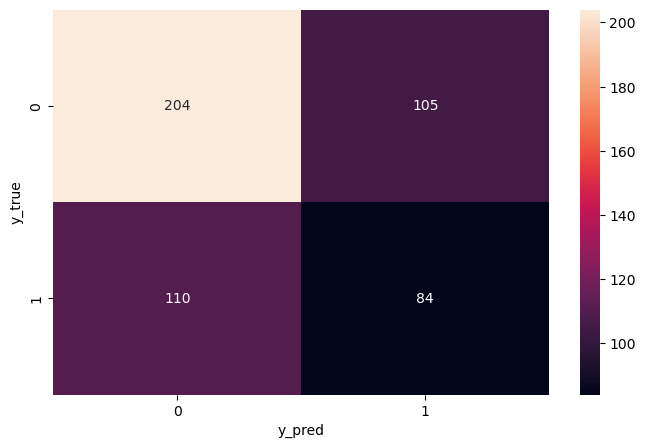

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [19]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       309
           1       0.44      0.43      0.44       194

    accuracy                           0.57       503
   macro avg       0.55      0.55      0.55       503
weighted avg       0.57      0.57      0.57       503



In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('PH')
plt.ylabel('Water Quality')
plt.legend()
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('PH')
plt.ylabel('Water Quality')
plt.legend()
plt.show()